# Problem Analysis Workshop 3

## Team Memebers ###

Eris Leksi - 9067882

Kapil Bhardwaj - 9064347 

Fasalu Rahman Kottaparambu - 8991782

Hello!

In this Problem Analysis Workshop we are going to focus on the term project now. After discussing it wth the team members, we chose our topic to be : "$TRUMP - sentiment analysis" . What we are going to do now is simple. We are going to take the dataset from an online API called AlphaVantage and we are going to show some EDA about the dataset. After that the next step consists of cleaning the data, and applying the requirements asked on problem analysis Workshop 3 rubric. 

LET"S START!

## 0. Importing the necessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import requests
import io

## 1. Loading the dataset from the API

In [21]:
API_KEY = 'IC5Z69JRSVKWG8LG'
symbol = 'TRUMP'
market = 'USD'

url = (
    f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY'
    f'&symbol={symbol}&market={market}&apikey={API_KEY}&datatype=csv'
)

response = requests.get(url)
data = pd.read_csv(io.StringIO(response.text))
print("Data loaded successfully.")
data.head()

Data loaded successfully.


,timestamp,open,high,low,close,volume
0,2025-07-02,8.58,8.97,8.50,8.92,316426.091
1,2025-07-01,8.89,9.02,8.52,8.58,479102.984
2,2025-06-30,9.25,9.25,8.82,8.88,382764.699
3,2025-06-29,9.13,9.30,8.99,9.24,194836.727
4,2025-06-28,9.02,9.13,8.96,9.12,292998.395


## 2. Displaying some EDA about the dataset

In [22]:
print(data.info())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data.describe())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data.isnull().sum())
print("-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------")
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  163 non-null    object 
 1   open       163 non-null    float64
 2   high       163 non-null    float64
 3   low        163 non-null    float64
 4   close      163 non-null    float64
 5   volume     163 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.8+ KB
None
-------------------------------*----------------------------------*-----------------------------------*-----------------------------------*-----------------------------------
             open        high         low       close        volume
count  163.000000  163.000000  163.000000  163.000000  1.630000e+02
mean    13.463926   14.213620   12.577485   13.274356  2.159857e+06
std      6.011314    6.614041    5.136652    5.653296  1.843767e+06
min      7.570000    7.870000    7.150000    7.560000  6.852430e+04
25% 

### 2.1. Time series plot

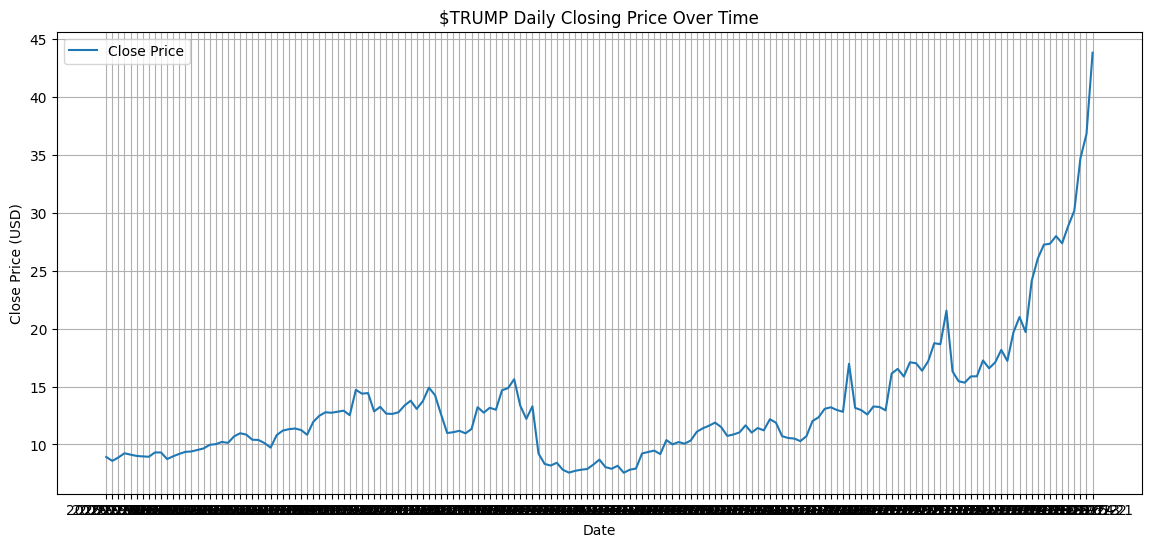

In [23]:
plt.figure(figsize=(14,6))
plt.plot(data['timestamp'], data['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('$TRUMP Daily Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

This chart visualizes the daily closing price trend over time, highlighting periods of volatility and stability.

### 2.2. Daily return calculation and histogram

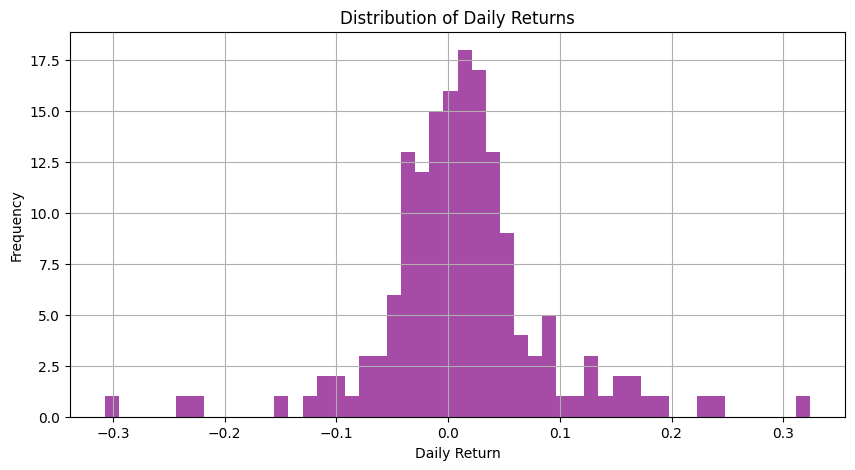

In [24]:
data['daily_return'] = data['close'].pct_change()

plt.figure(figsize=(10,5))
plt.hist(data['daily_return'].dropna(), bins=50, color='purple', alpha=0.7)
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns')
plt.grid(True)
plt.show()

The histogram shows the distribution of daily returns, illustrating how often small vs. large changes occur.

### 2.3. Correlation Heatmap

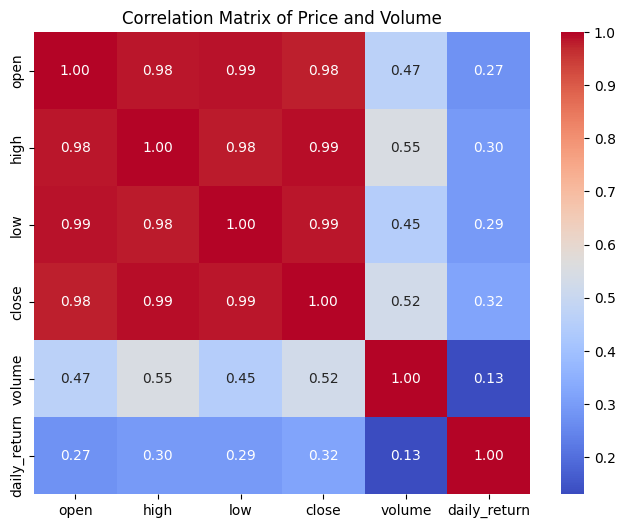

In [25]:
numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'daily_return']
corr = data[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Price and Volume')
plt.show()

The correlation matrix shows strong positive relationships between price features (open, high, low, close), as expected.

### 2.4. Boxplot for spotting the outleirs

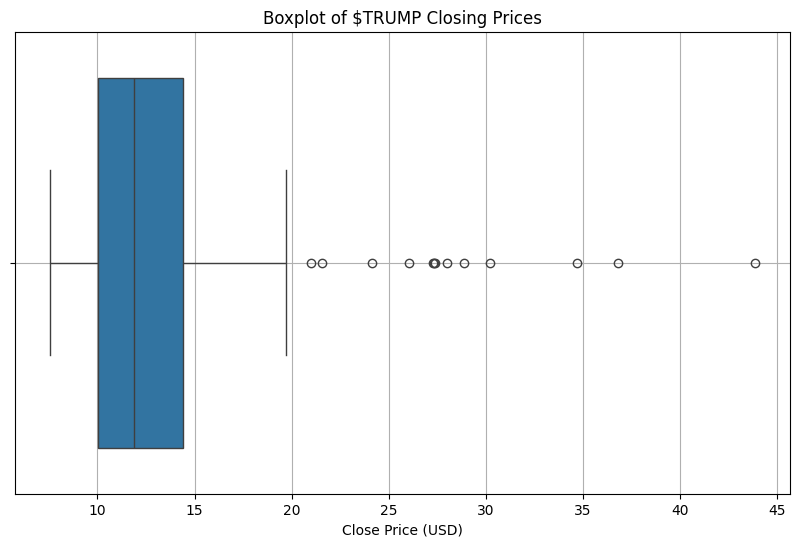

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['close'])
plt.title('Boxplot of $TRUMP Closing Prices')
plt.xlabel('Close Price (USD)')
plt.grid(True)
plt.show()

The boxplot helps detect price outliers and the overall spread of closing prices.

### 2.5. Moving average for smoothing (Timestamp = 7 days)

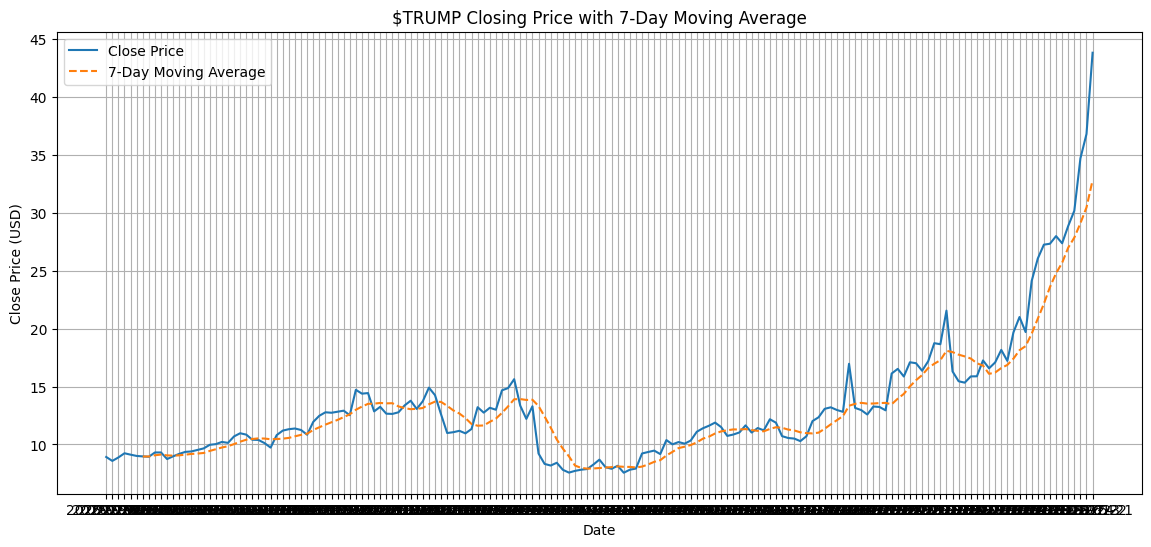

In [27]:
data['MA_7'] = data['close'].rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(data['timestamp'], data['close'], label='Close Price')
plt.plot(data['timestamp'], data['MA_7'], label='7-Day Moving Average', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('$TRUMP Closing Price with 7-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

The 7-day moving average smooths out short-term fluctuations to better reveal price trends.

## 3. Data Cleaning and Preparation

In [28]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.sort_values('timestamp', inplace=True)
data.reset_index(drop=True, inplace=True)

scaler = MinMaxScaler()
data['scaled_close'] = scaler.fit_transform(data[['close']])

print("Data is ready for clustering.")

Data is ready for clustering.


Steps we took to clean the data:

- Parse dates

- Sort chronologically

- Scale prices

## Markdown cell for explaining the clustering applicability

Clustering helps identify hidden patterns and structural similarities in $TRUMP price movements over time. By grouping together time periods with comparable price dynamics, we can better understand different volatility regimes, detect emerging market trends, and uncover potential anomalies. Applying K-Means clustering allows us to segment the scaled closing prices into distinct clusters that represent varying market behaviors and investor sentiment. These insights can inform prediction models, guide trading decisions, and support risk management strategies by highlighting when the market transitions between phases.


## 4. Applying the K-Means Clustering

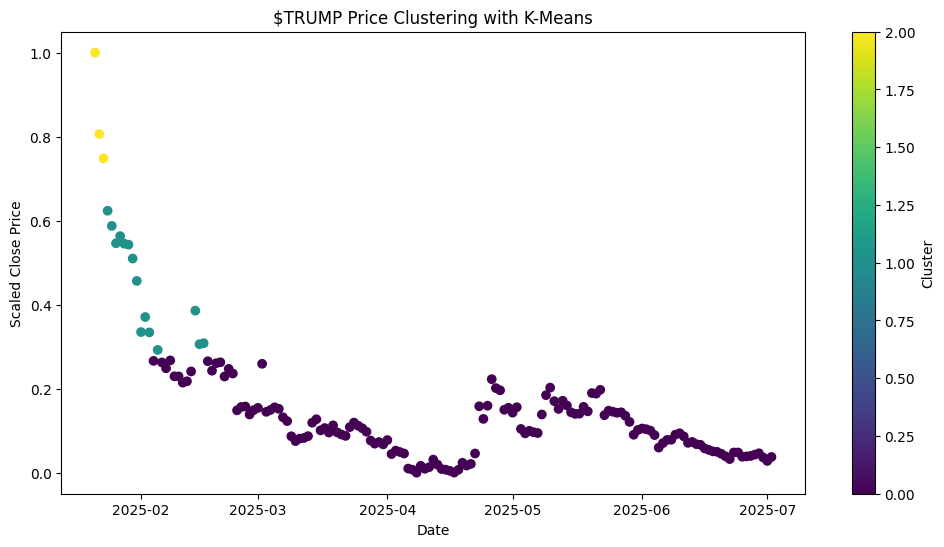

In [29]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['scaled_close']])

plt.figure(figsize=(12,6))
plt.scatter(data['timestamp'], data['scaled_close'], c=data['cluster'], cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Scaled Close Price')
plt.title('$TRUMP Price Clustering with K-Means')
plt.colorbar(label='Cluster')
plt.show()

## Interpretation of the output: 

K-Means successfully clustered $TRUMP closing prices into three distinct groups, revealing clear patterns of market behavior. Cluster 0 represents relatively stable periods with minimal price changes. Cluster 1 captures intervals of moderate fluctuations, suggesting normal trading activity. Cluster 2 highlights episodes of high volatility or unusual movements. This segmentation helps identify when the market shifts between different regimes, which can be crucial for improving prediction strategies, managing investment risk, and developing more responsive trading algorithms that adapt to changing conditions.